<a href="https://colab.research.google.com/github/dorotheeg/AI/blob/master/Final_Project_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sustainability and Education**
### *Does education influence the sustianbailty in the United States at the state level* 


In an age of information, it would be logical to think that with more education and information available about our surroundings, individuals and local governments would be more likely to make sustainable and environmentally conscious decisions. However, this is not a hard fact in today's world of misinformation. The aim of this research project is to identify if given more education, our actions are more or less sustainable, and if states that value education also value sustainability.

# Importing Packages and Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
import seaborn as sns
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import statistics
import statsmodels.stats.api as sms




This data is explores various sustainability factors of 214 countries/soverign states from 2014 to 2018. 

In [2]:
# Importing Datasets
# State based data with links to original sources

state_sus = pd.read_csv('/content/states sustainability - Sheet1.csv')
# https://wallethub.com/edu/greenest-states/11987
comp_req = pd.read_csv('/content/computer req - Sheet1.csv')
# https://nces.ed.gov/
ranks = pd.read_csv('/content/ranking education - Sheet1.csv') 
# https://www.nationsreportcard.gov/profiles/stateprofile?chort=2&sub=MAT&sj=AL&sfj=NP&st=MN&year=2017R3
c02 = pd.read_csv('/content/co2 - Sheet1 (1).csv')
# https://www.eia.gov/environment/emissions/state/
state_spend = pd.read_csv('/content/stateSpending.csv')
# https://worldpopulationreview.com/state-rankings/per-pupil-spending-by-state
energy = pd.read_csv('/content/energySource - Sheet1.csv')
# https://www.eia.gov/electricity/data/state/
digital = pd.read_csv('/content/computer_and_internet - Sheet1.csv')
# https://nces.ed.gov/programs/digest/d17/tables/dt17_702.60.asp
plastic = pd.read_csv('/content/plastic_bag - Sheet1.csv')
# https://www.ncsl.org/research/environment-and-natural-resources/plastic-bag-legislation.aspx
funding = pd.read_csv('/content/Funding Over Time - Sheet1.csv')
# https://edsource.org/2015/states-in-motion-school-finance-naep-child-poverty/83303



# Analysis and Tests

## Correlation coeficient
Test the correlation between state spending per pupil and the state's Sustianability scores

0.4233278557964842


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


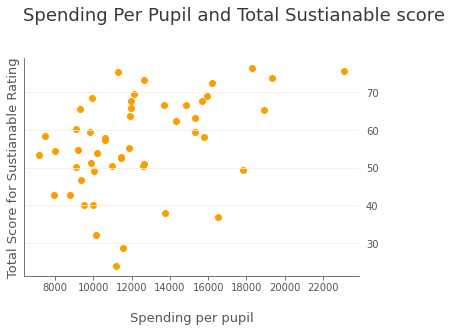

In [3]:
# Pre processing data, along with visualizing correaltion of spedning
# and sustainability scores per state

state_spend = state_spend.sort_values('State')

state_sus =  state_sus.sort_values('State')

tots = pd.merge(state_spend, state_sus, on="State")
tots = tots[['State', 'amountPerPupil', 'Total Score']]

a = (list(tots['amountPerPupil']))
c = (list(tots['Total Score']))

c = [int(i) for i in c]

a = np.array(list(tots['amountPerPupil'])).astype(np.float)
c = np.array(list(tots['Total Score'])).astype(np.float)

cc = np.corrcoef(a, c)
print(cc[0][1])

plt.scatter(tots['amountPerPupil'], tots['Total Score'],  color = "#fc9d03")
ax = plt.subplot(111)


ax.spines['top'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')
  
ax.yaxis.set_ticks_position('none') 


plt.suptitle("Spending Per Pupil and Total Sustianable score", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.61)
plt.xlabel("\nSpending per pupil", color = "#565556", fontsize=13)
plt.ylabel("Total Score for Sustianable Rating", color = "#565556", fontsize=13)

plt.show()


-0.41594980474763027


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


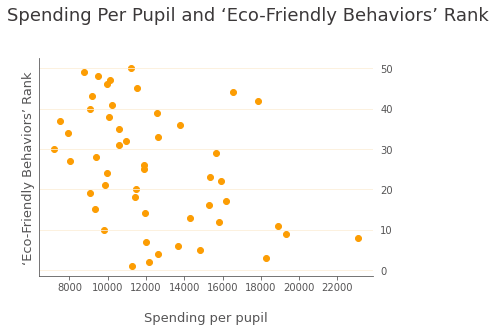

In [4]:
# Pre processing data, along with visualizing correaltion of spedning
# and sustainability Eco-Friendly Behaviors scores per state

state_spend = state_spend.sort_values('State')

state_sus =  state_sus.sort_values('State')

tots = pd.merge(state_spend, state_sus, on="State")
tots = tots[['State', 'amountPerPupil', '‘Eco-Friendly Behaviors’ Rank']]

a = (list(tots['amountPerPupil']))
c = (list(tots['‘Eco-Friendly Behaviors’ Rank']))
c = [int(i) for i in c]

a = np.array(list(tots['amountPerPupil'])).astype(np.float)
c = np.array(list(tots['‘Eco-Friendly Behaviors’ Rank'])).astype(np.float)

cc = np.corrcoef(a, c)
print(cc[0][1])


plt.scatter(tots['amountPerPupil'], tots['‘Eco-Friendly Behaviors’ Rank'],  color = "#fc9d03")


ax = plt.subplot(111)


ax.spines['top'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')


ax.yaxis.set_ticks_position('none') 


plt.suptitle("Spending Per Pupil and ‘Eco-Friendly Behaviors’ Rank", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.61)
plt.xlabel("\nSpending per pupil", color = "#565556", fontsize=13)
plt.ylabel("‘Eco-Friendly Behaviors’ Rank", color = "#565556", fontsize=13)

plt.show()



-0.4325135998283932


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


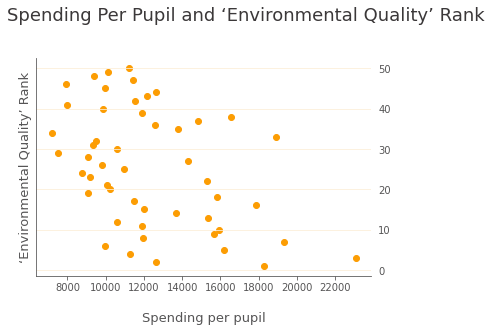

In [5]:
# Pre processing data, along with visualizing correaltion of spedning
# and sustainability Environmental Quality scores per state

state_spend = state_spend.sort_values('State')
state_sus =  state_sus.sort_values('State')

tots = pd.merge(state_spend, state_sus, on="State")
tots = tots[['State', 'amountPerPupil', '‘Environmental Quality’ Rank']]

a = (list(tots['amountPerPupil']))
c = (list(tots['‘Environmental Quality’ Rank']))

c = [int(i) for i in c]

a = np.array(list(tots['amountPerPupil'])).astype(np.float)
c = np.array(list(tots['‘Environmental Quality’ Rank'])).astype(np.float)

cc = np.corrcoef(a, c)
print(cc[0][1])


plt.scatter(tots['amountPerPupil'], tots['‘Environmental Quality’ Rank'],  color = "#fc9d03")


ax = plt.subplot(111)

ax.spines['top'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')
  
ax.yaxis.set_ticks_position('none') 




plt.suptitle("Spending Per Pupil and ‘Environmental Quality’ Rank", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.61)
plt.xlabel("\nSpending per pupil", color = "#565556", fontsize=13)
plt.ylabel("‘Environmental Quality’ Rank", color = "#565556", fontsize=13)

plt.show()


-0.36909210035667245


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


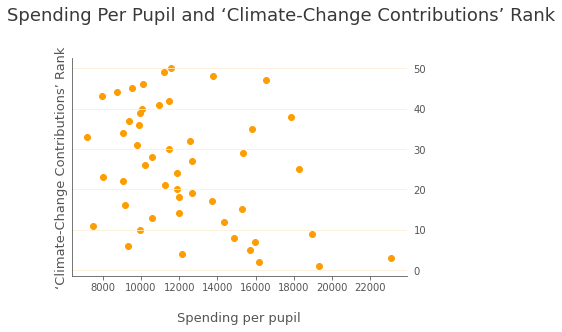

In [6]:
# Pre processing data, along with visualizing correaltion of spedning
# and sustainability Climate-Change Contributions scores per state

state_spend = state_spend.sort_values('State')

state_sus =  state_sus.sort_values('State')

tots = pd.merge(state_spend, state_sus, on="State")
tots = tots[['State', 'amountPerPupil', '‘Climate-Change Contributions’ Rank']]

a = (list(tots['amountPerPupil']))
c = (list(tots['‘Climate-Change Contributions’ Rank']))

c = [int(i) for i in c]

a = np.array(list(tots['amountPerPupil'])).astype(np.float)
c = np.array(list(tots['‘Climate-Change Contributions’ Rank'])).astype(np.float)

cc = np.corrcoef(a, c)
print(cc[0][1])

plt.scatter(tots['amountPerPupil'], tots['‘Climate-Change Contributions’ Rank'],  color = "#fc9d03")

ax = plt.subplot(111)

ax.spines['top'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')
   
ax.yaxis.set_ticks_position('none') 


plt.suptitle("Spending Per Pupil and ‘Climate-Change Contributions’ Rank", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.61)
plt.xlabel("\nSpending per pupil", color = "#565556", fontsize=13)
plt.ylabel("‘Climate-Change Contributions’ Rank", color = "#565556", fontsize=13)

plt.show()


## Linear regression

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


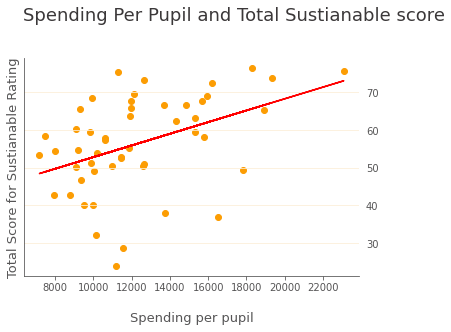

R squared 0.17920647349324859
intercept: 37.344010342146696
slope: [0.00154528]
predicted response:
[52.04119108 64.90875748 49.71090525 52.74583985 56.10837431 52.50168523
 67.20195653 60.98992135 51.36744796 53.11361705 59.47554462 48.91199426
 61.04400624 52.86637187 55.05449172 54.28185053 52.98381333 54.64962774
 58.49892615 60.28836315 62.37294909 55.74368767 56.88719663 50.89768212
 53.70700549 55.02667664 56.78211743 51.74604214 61.57867394 66.58075301
 52.61294556 73.02612583 51.36281211 58.60709592 56.88410606 49.61355246
 54.75007109 61.75638142 61.98044736 53.70855077 52.70257194 51.53588374
 51.83103267 48.43759256 65.60722511 55.71123674 55.87040082 55.19820299
 55.83794989 62.8983451 ]


In [7]:
# Fitted the linear regression with the line of best fit, 
# found the R-squared values, slope, and interecept along with visualizing it

state_spend = state_spend.sort_values('State')

state_sus =  state_sus.sort_values('State')

tots = pd.merge(state_spend, state_sus, on="State")
tots = tots[['State', 'amountPerPupil', 'Total Score']]

a = (list(tots['amountPerPupil']))
c = (list(tots['Total Score']))

c = [int(i) for i in c]

a = np.array(list(tots['amountPerPupil'])).astype(np.float)
c = np.array(list(tots['Total Score'])).astype(np.float)


m, b = np.polyfit(tots['amountPerPupil'], tots['Total Score'], 1)
plt.plot(tots['amountPerPupil'], m*tots['amountPerPupil'] + b, color = "red")

plt.scatter(tots['amountPerPupil'], tots['Total Score'],  color = "#fc9d03")


ax = plt.subplot(111)


ax.spines['top'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')
 
ax.yaxis.set_ticks_position('none') 


plt.suptitle("Spending Per Pupil and Total Sustianable score", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.61)
plt.xlabel("\nSpending per pupil", color = "#565556", fontsize=13)
plt.ylabel("Total Score for Sustianable Rating", color = "#565556", fontsize=13)

plt.show()


x = np.array(tots['amountPerPupil']).reshape((-1, 1))
y = np.array(tots['Total Score'])

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('R squared', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')



## Linear regression T-test

In [8]:
# Hypothesis test on the slope 

x = np.array(tots['amountPerPupil'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(p_value)

if p_value<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0021905241648494944
reject null hypothesis


## Linear regression confidence interval

In [9]:
# Confidence Interval on the slope 

reg_model = OLS(y, sm.add_constant(x)).fit()
display(reg_model.summary())

x = np.array(x).reshape((-1, 1))
y = np.array(y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('R squared', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     10.48
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00219
Time:                        21:14:00   Log-Likelihood:                -192.21
No. Observations:                  50   AIC:                             388.4
Df Residuals:                      48   BIC:                             392.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3440      6.108      6.114      0.000      25.062      49.626
x1             0.0015      0.000      3.237      0.002       0.001       0.003
==============================================================================
Omnibus:                        7.028   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.201
Skew:                          -0.838   Prob(JB):                       0.0450
Kurtosis:                       3.405   Cond. No.                     4.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared 0.17920647349324859
intercept: 37.344010342146696
slope: [0.00154528]


## Linear regs T test on Environmental Quality and spending

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


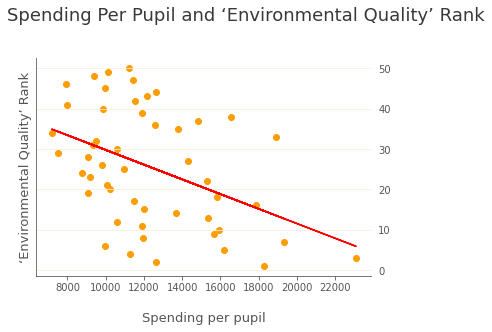

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     11.05
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00171
Time:                        21:14:01   Log-Likelihood:                -199.24
No. Observations:                  50   AIC:                             402.5
Df Residuals:                      48   BIC:                             406.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.0172      7.031      6.830      0.000      33.881      62.153
x1            -0.0018      0.001     -3.323      0.002      -0.003      -0.001
==============================================================================
Omnibus:                        7.393   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                2.507
Skew:                           0.099   Prob(JB):                        0.285
Kurtosis:                       1.921   Cond. No.                     4.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared 0.18706801403651552
intercept: 48.0171972595261
slope: [-0.00182596]


In [10]:
# Running the same code as above compiled into one
# for a hypothesis test on the slope of the Environmental Quality and spending

state_spend = state_spend.sort_values('State')
state_sus =  state_sus.sort_values('State')

tots = pd.merge(state_spend, state_sus, on="State")
tots = tots[['State', 'amountPerPupil', '‘Environmental Quality’ Rank']]

a = (list(tots['amountPerPupil']))
c = (list(tots['‘Environmental Quality’ Rank']))
c = [int(i) for i in c]


a = np.array(list(tots['amountPerPupil'])).astype(np.float)
c = np.array(list(tots['‘Environmental Quality’ Rank'])).astype(np.float)



m, b = np.polyfit(tots['amountPerPupil'], tots['‘Environmental Quality’ Rank'], 1)
plt.plot(tots['amountPerPupil'], m*tots['amountPerPupil'] + b, color = "red")

plt.scatter(tots['amountPerPupil'], tots['‘Environmental Quality’ Rank'],  color = "#fc9d03")

ax = plt.subplot(111)


ax.spines['top'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')


ax.yaxis.set_ticks_position('none') 

plt.suptitle("Spending Per Pupil and ‘Environmental Quality’ Rank", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.61)
plt.xlabel("\nSpending per pupil", color = "#565556", fontsize=13)
plt.ylabel("‘Environmental Quality’ Rank", color = "#565556", fontsize=13)

plt.show()

x = a
y = c


reg_model = OLS(y, sm.add_constant(x)).fit()
display(reg_model.summary())

x = np.array(x).reshape((-1, 1))
y = np.array(y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('R squared', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


## Hypothesis Test Difference of Means

Null Hypothesis: There will be no difference between the c02 emmisions between 2000 and 2014 on avergae per state.

Alternative Hypothesis: There will be less c02 emmisions between 2000 and 2014 on avergae per state.

In [45]:
# Difference of means of c02 emmisions over time

c022 = c02

old = np.array(list(c022['2000'])).astype(np.float)
new = np.array(list(c022['2014'])).astype(np.float)
print("Mean 1", statistics.mean(old) )
print("Mean 2", statistics.mean(new) )

ttest,pval = stats.ttest_rel(old, new)
print(ttest, pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

# We reject the null, implying there is significant data to support that the 
# c02 emissions have decreased over time.

SE = (((statistics.stdev(old) ** 2)/len(old)) + (statistics.stdev(new) **2)/ len(new) ) **.5
print("SE ", SE)
z = 1.96 
minus = ((statistics.mean(old) - statistics.mean(new)) - (z * SE))
plus = ((statistics.mean(old) - statistics.mean(new)) + (z * SE))
print("Confidence Interval", minus, plus)


Mean 1 325.85
Mean 2 301.212962962963
2.171470826153983 0.034392435980699076
reject null hypothesis
SE  204.4947292457248
Confidence Interval -376.1726322845836 425.44670635865765


Null Hypothesis: There will be no difference between the school funding (with consideration for inflations) between 2000 and 2014 on avergae per state.

Alternative Hypothesis: There will be more state aid in school funding (with consideration for inflations) between 2000 and 2014 on avergae per state.

In [44]:
# Difference of means of funding over time

funds = funding[:53]
old = np.array(list(funds['2000'])).astype(np.float)
new = np.array(list(funds['2014'])).astype(np.float)
print("Mean 1", statistics.mean(old) )
print("Mean 2", statistics.mean(new) )

ttest,pval = stats.ttest_rel(old, new)
print(ttest, pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

# We reject the null, implying there is significant data to support that the 
# state's funding have increased over time.


SE = (((statistics.stdev(old) ** 2)/len(old)) + (statistics.stdev(new) **2)/ len(new) ) **.5
print("SE ", SE)
z = 1.96 
minus = ((statistics.mean(old) - statistics.mean(new)) - (z * SE))
plus = ((statistics.mean(old) - statistics.mean(new)) + (z * SE))
print("Confidence Interval", minus, plus)

Mean 1 10218.392156862745
Mean 2 12341.156862745098
-7.075342717917054 4.574723550770415e-09
reject null hypothesis
SE  608.5633577152918
-3315.548887004325 -929.9805247603813


## Chi Square

In [13]:
# Pre processing to run the Chi Square

data_sus = state_sus[['State', 'Overall Rank\n(1=Greenest)']]
data_sus = data_sus.dropna()
data_sus

data_ed = ranks[['JURISDICTION', 'AVERAGE SCORE\n(0 - 500)']]
data_ed = data_ed[1:54]
data_ed.rename(columns = {'JURISDICTION':'State'}, inplace = True) 
alls = pd.merge(data_sus, data_ed, on="State")
alls.rename(columns = {'Overall Rank\n(1=Greenest)':'Sus', 'AVERAGE SCORE\n(0 - 500)':'Ed'}, inplace = True)
alls['Ed'] = alls['Ed'].astype(int)
alls['Sus'] = alls['Sus'].astype(int)
alls.drop(['State'], axis=1)

ed = np.array(alls['Ed'])
sus = np.arange(len(ed))


temp = [sus, ed]
temp


[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([268, 277, 282, 274, 277, 286, 284, 278, 279, 281, 277, 284, 282,
        288, 286, 285, 278, 267, 284, 281, 297, 280, 294, 271, 281, 286,
        288, 275, 293, 292, 269, 282, 282, 288, 288, 275, 282, 286, 277,
        275, 286, 279, 282, 287, 288, 290, 289, 273, 288, 289])]

In [14]:
# Running the Chi Square to test for independence between education rank
# and sus rank on a state level

stat, p, dof, expected = chi2_contingency(temp)

print('dof=%d' % dof)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
 
 # there is evidence to support these variables are not independent from one another



dof=49
probability=0.950, critical=66.339, stat=386.123
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


#### Visualize these variables

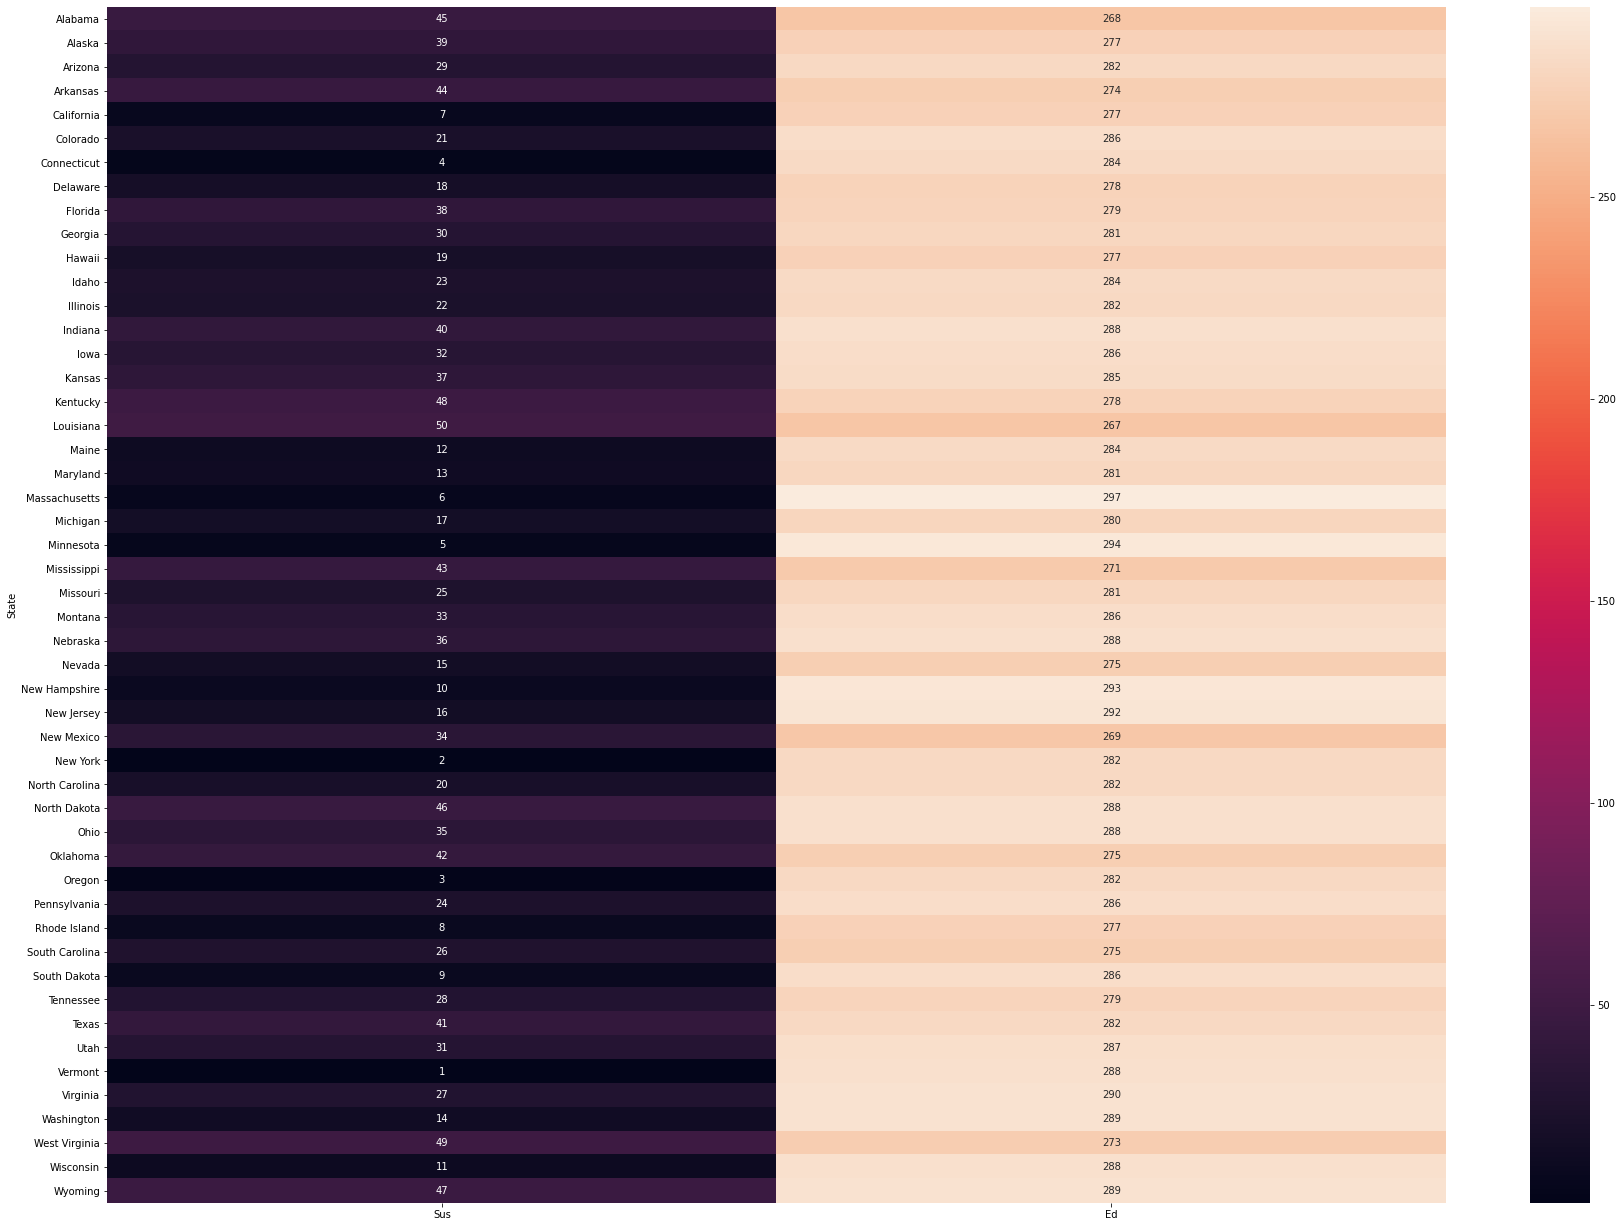

In [15]:
# Heat map data visual

alls.set_index('State', inplace=True)
plt.rcParams["figure.figsize"]=(30,22)
#generate a heatmap
sns.heatmap(alls, annot=True, fmt="d")
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


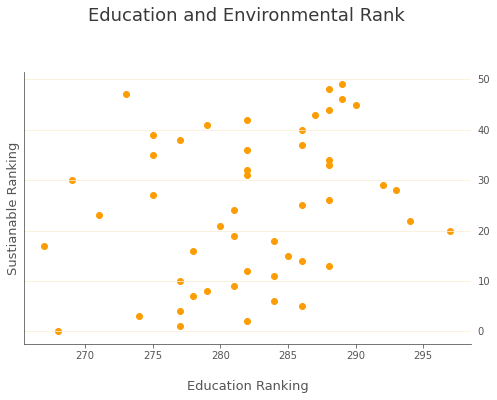

In [16]:
#  Visial of scatter plot of data that matches the theme

plt.rcParams["figure.figsize"]=(8,5)
plt.scatter(ed, sus,  color = "#fc9d03")


ax = plt.subplot(111)
ax.spines['top'].set_visible(False)

ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')
  
ax.yaxis.set_ticks_position('none') 


plt.suptitle("Education and Environmental Rank", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.51)
plt.xlabel("\nEducation Ranking", color = "#565556", fontsize=13)
plt.ylabel("Sustianable Ranking", color = "#565556", fontsize=13)

plt.show()

## Extra Visualizations

#### State spending

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


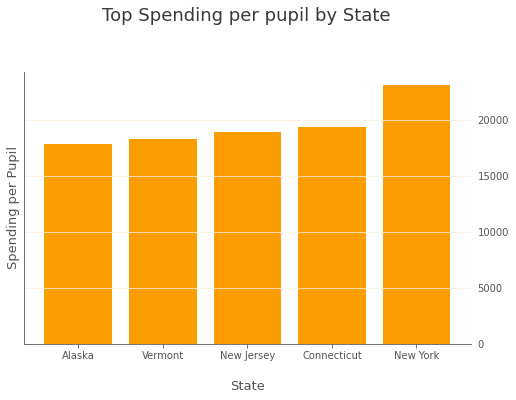

In [17]:
# State Spending in highest per pupil states

state_spend = state_spend.sort_values(by=['amountPerPupil'])
top_five = state_spend[45:]

a = (list(top_five['amountPerPupil']))

a = np.array(list(top_five['amountPerPupil'])).astype(np.float)

plt.bar(top_five["State"], top_five['amountPerPupil'],  color = "#fc9d03")


ax = plt.subplot(111)

ax.spines['top'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')

   
ax.yaxis.set_ticks_position('none') 

plt.suptitle("Top Spending per pupil by State", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.51)
plt.xlabel("\nState", color = "#565556", fontsize=13)
plt.ylabel("Spending per Pupil", color = "#565556", fontsize=13)

plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


['Alaska', 'Vermont', 'New Jersey', 'Connecticut', 'New York']


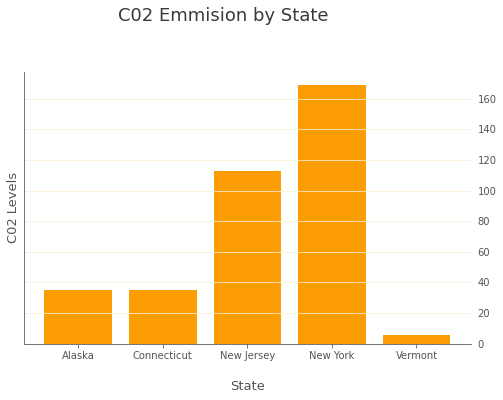

In [18]:
# c02 emissions in same states as above


top_five_c = c02[['State','2014']]

state_list = list(top_five['State'])
print(state_list)
top_five_c = top_five_c.loc[top_five_c['State'].isin(state_list)]

a = (list(top_five_c['2014']))

a = np.array(list(top_five_c['2014'])).astype(np.float)

plt.bar(top_five_c["State"], top_five_c['2014'],  color = "#fc9d03")


ax = plt.subplot(111)

ax.spines['top'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')

   
ax.yaxis.set_ticks_position('none') 

plt.suptitle("C02 Emmision by State", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.47)
plt.xlabel("\nState", color = "#565556", fontsize=13)
plt.ylabel("C02 Levels", color = "#565556", fontsize=13)

plt.show()



#### Spending over time



In [19]:
# visual for funding over time

ny = funding[funding['State'] == "New York"]
vt = funding[funding['State'] == "Vermont"]
ct = funding[funding['State'] == "Connecticut"]
nj = funding[funding['State'] == "New Jersey"]
al = funding[funding['State'] == "Alaska"]

ct_list = ct.values.tolist()
ct_list = ct_list[0][30:]

vt_list = vt.values.tolist()
vt_list = vt_list[0][30:]

ny_list = ny.values.tolist()
ny_list = ny_list[0][30:]

nj_list = nj.values.tolist()
nj_list = nj_list[0][30:]

al_list = al.values.tolist()
al_list = al_list[0][30:]

labels = list(ct)[30:]
# labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


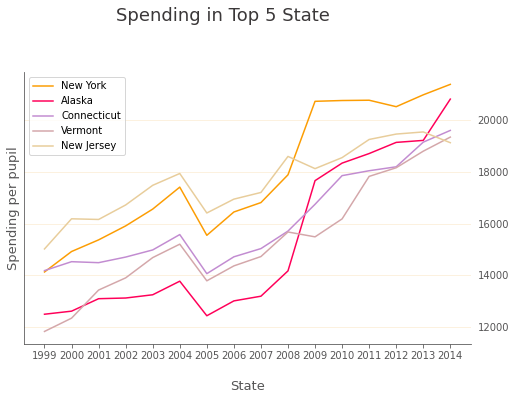

In [20]:
plt.plot(ny_list, label = "New York", color = '#fc9d03')
plt.plot(al_list, label = "Alaska", color = '#ff0059')
plt.plot(ct_list, label = "Connecticut", color = '#c28cd1')
plt.plot(vt_list, label = "Vermont", color = '#d4a7aa')
plt.plot(nj_list, label = "New Jersey", color = '#e8cd9b')
plt.legend()

ticks = np.arange(len(ny_list))

ax = plt.subplot(111)

ax.spines['top'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')

   
ax.yaxis.set_ticks_position('none') 

plt.suptitle("Spending in Top 5 State", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.47)
plt.xlabel("\nState", color = "#565556", fontsize=13)
plt.ylabel("Spending per pupil", color = "#565556", fontsize=13)

plt.xticks(ticks,labels)

plt.show()

#### C02 over time

In [21]:
# Tracking c02 over time

# visual for funding over time

ny = c02[c02['State'] == "New York"]
vt = c02[c02['State'] == "Vermont"]
ct = c02[c02['State'] == "Connecticut"]
nj = c02[c02['State'] == "New Jersey"]
al = c02[c02['State'] == "Alaska"]

ct_list = ct.values.tolist()
ct_list = ct_list[0][10:-7]

vt_list = vt.values.tolist()
vt_list = vt_list[0][10:-7]

ny_list = ny.values.tolist()
ny_list = ny_list[0][10:-7]

nj_list = nj.values.tolist()
nj_list = nj_list[0][10:-7]

al_list = al.values.tolist()
al_list = al_list[0][10:-7]

labels = list(ct)[10:-7]
# labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


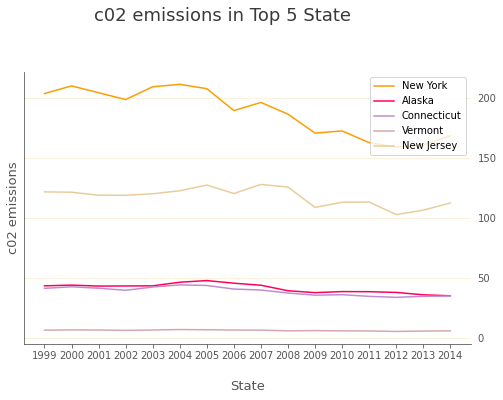

In [22]:
plt.plot(ny_list, label = "New York", color = '#fc9d03')
plt.plot(al_list, label = "Alaska", color = '#ff0059')
plt.plot(ct_list, label = "Connecticut", color = '#c28cd1')
plt.plot(vt_list, label = "Vermont", color = '#d4a7aa')
plt.plot(nj_list, label = "New Jersey", color = '#e8cd9b')
plt.legend()

ticks = np.arange(len(ny_list))

ax = plt.subplot(111)

ax.spines['top'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')

   
ax.yaxis.set_ticks_position('none') 

plt.suptitle("c02 emissions in Top 5 State", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.47)
plt.xlabel("\nState", color = "#565556", fontsize=13)
plt.ylabel("c02 emissions", color = "#565556", fontsize=13)

plt.xticks(ticks,labels)

plt.show()

#### Digital literacy and platic bag laws

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


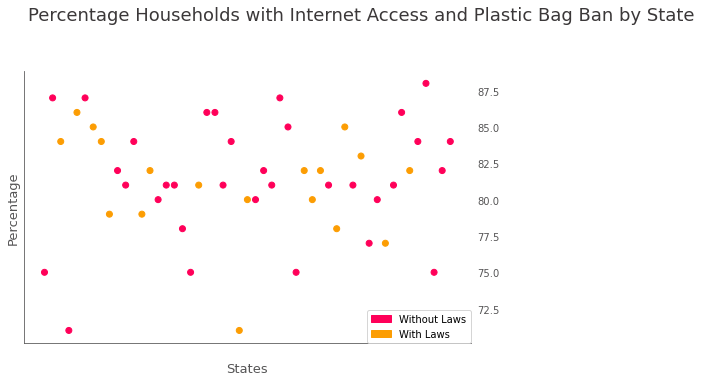

In [23]:
# preprocessing and visual for digitial literacy and plastic bag bans

lit = digital[['State', 'Percent.1']]
colors = np.where(plastic["Plastic Bag Laws"]=='No','#ff0059','#fc9d03')
plt.scatter( lit['State'], lit["Percent.1"],c=colors)

y = np.arange(0)

plt.xticks(y, " ")

ax = plt.subplot(111)

ax.spines['top'].set_visible(False)

ax.yaxis.tick_right()

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')

 
ax.yaxis.set_ticks_position('none') 

plt.suptitle("Percentage Households with Internet Access and Plastic Bag Ban by State", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.71)
plt.xlabel("\nStates", color = "#565556", fontsize=13)
plt.ylabel("Percentage", color = "#565556", fontsize=13)

r_patch = mpatches.Patch(color='#fc9d03', label='With Laws')
y_patch = mpatches.Patch(color='#ff0059', label='Without Laws')
plt.legend(handles=[y_patch,r_patch],loc='lower right', borderaxespad=0.)

plt.show()



#### Energy usage by state ranking

In [24]:
# pre processing energy per state

rank_sus = state_sus.sort_values(by=['Overall Rank\n(1=Greenest)'])
rank_sus = rank_sus[["State", "Total Score"]]
rank_sus
top_sus = rank_sus[:5]
ac = ['VT', "NY", "OR", "CN", "MN"]
top_sus

,State,Total Score
0,Vermont,76.35
1,New York,75.49
2,Oregon,75.24
3,Connecticut,73.89
4,Minnesota,73.13


In [25]:
# more preprocessing... very messy data

VT = energy.loc[energy['AK'] == "VT"].loc[energy['Total Electric Power Industry'] == "Total Electric Power Industry"]
NY = energy.loc[energy['AK'] == "NY"].loc[energy['Total Electric Power Industry'] == "Total Electric Power Industry"]
OR = energy.loc[energy['AK'] == "OR"].loc[energy['Total Electric Power Industry'] == "Total Electric Power Industry"]
CT = energy.loc[energy['AK'] == "CT"].loc[energy['Total Electric Power Industry'] == "Total Electric Power Industry"]
MN = energy.loc[energy['AK'] == "MN"].loc[energy['Total Electric Power Industry'] == "Total Electric Power Industry"]

vt = []
ny = []
or_ = []
ct = []
mn = []

for x in np.array(VT['25,668,703']):
  vt.append(int(x.replace(',', '')))
for x in np.array(NY['25,668,703']):
  ny.append(int(x.replace(',', '')))
for x in np.array(OR['25,668,703']):
  or_.append(int(x.replace(',', '')))
for x in np.array(CT['25,668,703']):
  ct.append(int(x.replace(',', '')))
for x in np.array(MN['25,668,703']):
  mn.append(int(x.replace(',', '')))


vt.insert(0,0)
vt.insert(2,0)
ct.insert(2,0)
or_[1],or_[2] = or_[2],or_[1] 
mn.insert(2,0)

# print(len(vt))
# print(len(ny))
# print(len(or_))
# print(len(ct))
# print(len(mn))


def per(lis):
  s = sum(lis)
  for i, val in enumerate(lis):
    lis[i] = (val/s) * 100
  return lis



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


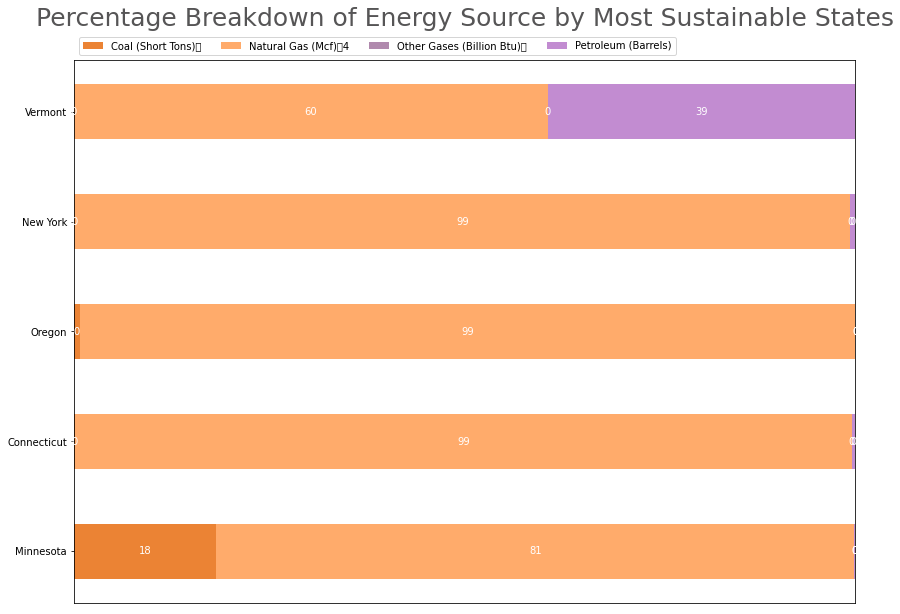

In [26]:
# plotting a horizontal stacked bar graph by top sus states and thei energy sources

category_names = ['Coal (Short Tons)	', 'Natural Gas (Mcf)	4',
                  'Other Gases (Billion Btu)	', 'Petroleum (Barrels)']
results = {
    'Vermont': per(vt),
    'New York': per(ny),
    'Oregon': per(or_),
    'Connecticut': per(ct),
    'Minnesota': per(mn),

}

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = ['#eb8334', '#ffab6b', '#b089ad', '#c28cd1']

    fig, ax = plt.subplots(figsize=(14, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        x = color
        text_color =  'white'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)
plt.title("Percentage Breakdown of Energy Source by Most Sustainable States\n", fontsize = 25, color = '#565556')
plt.show()

### Condfidence interval graphed

[39.99, 49.41, 54.33, 40.09, 69.4, 59.57, 73.89, 63.19, 50.15, 53.89, 62.4, 58.48, 59.51, 49.18, 52.88, 50.36, 32.23, 23.96, 66.73, 66.6, 72.53, 63.65, 73.13, 42.69, 57.94, 52.44, 50.53, 65.63, 67.79, 65.25, 51.18, 75.49, 60.32, 37.9, 50.87, 42.8, 75.24, 58.08, 69.0, 57.39, 68.45, 54.71, 46.67, 53.27, 76.35, 55.22, 65.77, 28.77, 67.79, 36.91]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


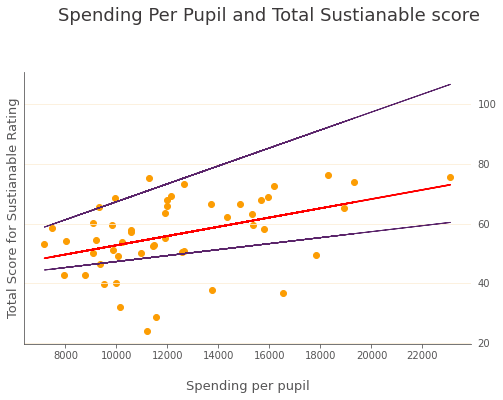

In [27]:
# plotting the confidence interval of the linear regression

state_spend = state_spend.sort_values('State')

state_sus =  state_sus.sort_values('State')

tots = pd.merge(state_spend, state_sus, on="State")
tots = tots[['State', 'amountPerPupil', 'Total Score']]

a = (list(tots['amountPerPupil']))
c = (list(tots['Total Score']))
print(c)
c = [int(i) for i in c]

a = np.array(list(tots['amountPerPupil'])).astype(np.float)
c = np.array(list(tots['Total Score'])).astype(np.float)

m, b = np.polyfit(tots['amountPerPupil'], tots['Total Score'], 1)
plt.plot(tots['amountPerPupil'], m*tots['amountPerPupil'] + b, color = "red")


plt.plot(tots['amountPerPupil'], .001*tots['amountPerPupil'] + b, color = "#5b256b", linewidth=1)
plt.plot(tots['amountPerPupil'], .003*tots['amountPerPupil'] + b, color = "#5b256b", linewidth=1)


plt.scatter(tots['amountPerPupil'], tots['Total Score'],  color = "#fc9d03")


ax = plt.subplot(111)


ax.spines['top'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.grid(True, color ="#fceed7") 

ax.spines['right'].set_color('#ffffff')
ax.spines['left'].set_color('#565556')
ax.spines['bottom'].set_color('#565556')
ax.tick_params(axis='y', colors='#565556')
ax.tick_params(axis='x', colors='#565556')

   
ax.yaxis.set_ticks_position('none') 


plt.suptitle("Spending Per Pupil and Total Sustianable score", ha = 'center' , y=1.06, fontsize=18, color = "#3b3839", x = 0.55)
plt.xlabel("\nSpending per pupil", color = "#565556", fontsize=13)
plt.ylabel("Total Score for Sustianable Rating", color = "#565556", fontsize=13)

plt.show()
